#Implemantation of K-means, Mountain and Subtractive Clustering method, and also comparing their performances.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Load data from file
data = np.loadtxt("jain.txt")

# Extract features (first two columns) and true labels (third column)
X = data[:, :2]
true_labels = data[:, 2]

# Define Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [ ]:
# Define K-means clustering algorithm
def k_means_clustering(X, k, max_iterations=5):
    # Initialize centroids randomly
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.array([[euclidean_distance(x, c) for c in centroids] for x in X]), axis=1)
        # Update centroids
        centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return labels, centroids

In [ ]:
def mountain_clustering(X, num_clusters, sigma=1.0, beta=0.2, max_iterations=5):
    # Step 1: Form a grid in the data space
    grid_size = 0.1  # Define grid size
    x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
    y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
    x_grid = np.arange(x_min, x_max, grid_size)
    y_grid = np.arange(y_min, y_max, grid_size)
    xx, yy = np.meshgrid(x_grid, y_grid, indexing='ij')
    V = np.column_stack((xx.ravel(), yy.ravel()))  # Set of grid intersections as cluster center candidates

    # Step 2: Construct mountain functions
    mountain_heights = np.zeros(len(V))
    for i, v in enumerate(V):
        mountain_height = 0
        for x in X:
            distance = euclidean_distance(x, v)
            mountain_height += np.exp(-distance ** 2 / (2 * sigma ** 2))
        mountain_heights[i] = mountain_height

    # Step 3: Select cluster centers and update mountain functions
    cluster_centers = []
    for _ in range(num_clusters):
        max_height_index = np.argmax(mountain_heights)
        cluster_centers.append(V[max_height_index])
        # Update mountain heights
        for i, v in enumerate(V):
            mountain_heights[i] -= mountain_heights[max_height_index] * np.exp(-euclidean_distance(v, V[max_height_index]) ** 2 / (2 * beta ** 2))

    # Assign each point to the nearest cluster center
    distances_to_centers = np.array([[euclidean_distance(x, c) for c in cluster_centers] for x in X])
    labels = np.argmin(distances_to_centers, axis=1)

    return labels, np.array(cluster_centers)


In [ ]:
def subtractive_clustering(X, num_clusters, sigma=0.5, beta=0.2, max_iterations=5):
    # Step 1: Use data samples as cluster center candidates
    V = X

    # Step 2: Construct mountain functions
    mountain_heights = np.zeros(len(V))
    for i, v in enumerate(V):
        mountain_height = 0
        for x in X:
            distance = euclidean_distance(x, v)
            mountain_height += np.exp(-distance ** 2 / (2 * sigma ** 2))
        mountain_heights[i] = mountain_height

    # Step 3: Select cluster centers and update mountain functions
    cluster_centers = []
    for _ in range(num_clusters):
        max_height_index = np.argmax(mountain_heights)
        cluster_centers.append(V[max_height_index])
        # Update mountain heights
        for i, v in enumerate(V):
            mountain_heights[i] -= mountain_heights[max_height_index] * np.exp(-euclidean_distance(v, V[max_height_index]) ** 2 / (2 * beta ** 2))

    # Assign each point to the nearest cluster center
    distances_to_centers = np.array([[euclidean_distance(x, c) for c in cluster_centers] for x in X])
    labels = np.argmin(distances_to_centers, axis=1)

    return labels, np.array(cluster_centers)

In [ ]:
# Function to plot the data points with assigned clusters
def plot_clusters(X, labels, centroids=None, title='Clustering Result'):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolors='k')
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, c='red', edgecolors='k')
    plt.title(title)  # Set the title dynamically using the title parameter
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Function to evaluate the clustering performance
def evaluate_clustering(true_labels, predicted_labels):
    correctly_clustered = np.sum(true_labels == predicted_labels)
    total_data_points = len(true_labels)
    accuracy = correctly_clustered / total_data_points * 100
    return accuracy

In [ ]:
# Apply K-means clustering
start_time = time.time()
k_labels, k_centroids = k_means_clustering(X, k=2)
k_runtime = time.time() - start_time
k_accuracy = evaluate_clustering(true_labels, k_labels)

# Apply Mountain clustering
start_time = time.time()
m_labels, m_centers = mountain_clustering(X, num_clusters=2)
m_runtime = time.time() - start_time
m_accuracy = evaluate_clustering(true_labels, m_labels)

# Apply Subtractive clustering
start_time = time.time()
s_labels, s_centers = subtractive_clustering(X, num_clusters=2)
s_runtime = time.time() - start_time
s_accuracy = evaluate_clustering(true_labels, s_labels)

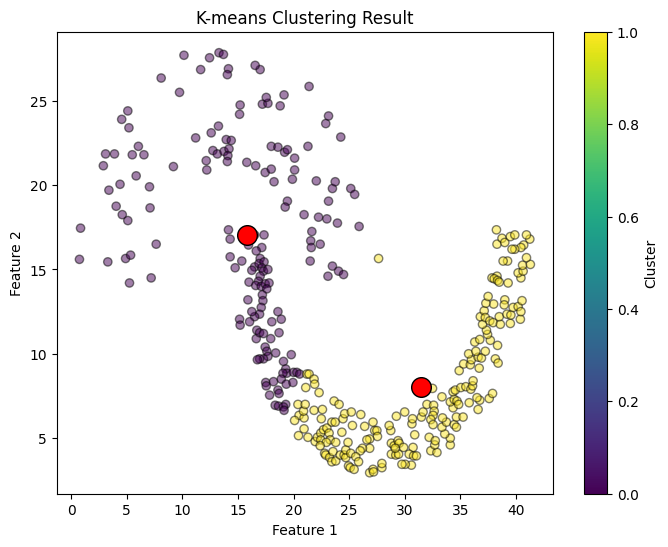

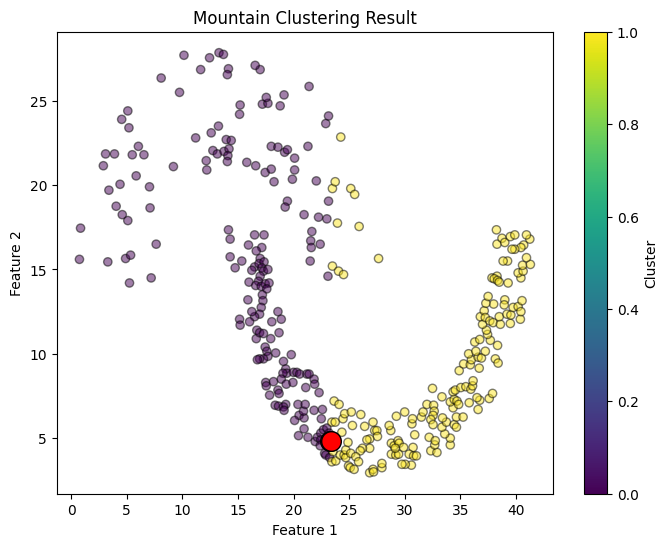

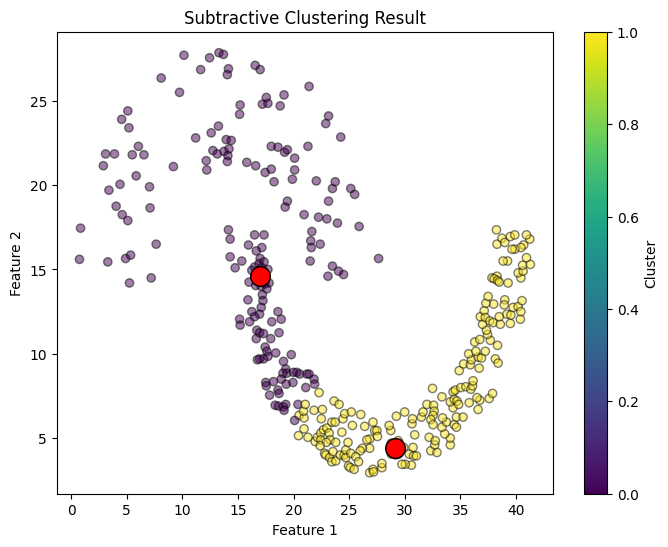

K-means clustering accuracy: 54.16%
Mountain clustering accuracy: 46.11%
Subtractive clustering accuracy: 52.28%
K-means clustering runtime: 0.0682 seconds
Mountain clustering runtime: 340.7170 seconds
Subtractive clustering runtime: 2.0535 seconds


In [ ]:
# Plot clustering results
plot_clusters(X, k_labels, k_centroids, title='K-means Clustering Result')
plot_clusters(X, m_labels, m_centers, title='Mountain Clustering Result')
plot_clusters(X, s_labels, s_centers, title='Subtractive Clustering Result')

# Print performance metrics and runtime
print("K-means clustering accuracy: {:.2f}%".format(k_accuracy))
print("Mountain clustering accuracy: {:.2f}%".format(m_accuracy))
print("Subtractive clustering accuracy: {:.2f}%".format(s_accuracy))
print("K-means clustering runtime: {:.4f} seconds".format(k_runtime))
print("Mountain clustering runtime: {:.4f} seconds".format(m_runtime))
print("Subtractive clustering runtime: {:.4f} seconds".format(s_runtime))

The **sigma** and **beta** parameters for Mountain and Subtractive clustering can be adjusted to observe their effects on clustering results and runtime.

#Implementation of K-means and Fuzzy c-means clustering methods and comparing their performances on a given data point

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data = np.loadtxt("butterfly.txt")

# Extract features (first two columns) and true labels (third column)
X = data[:, :2]

In [14]:
def fuzzy_c_means_clustering(X, k, m=2, max_iterations=5, error=1e-4):
    n = X.shape[0]  # Number of data points
    c = X.shape[1]  # Number of features

    # Initialize membership matrix randomly
    U = np.random.rand(n, k)
    U /= np.sum(U, axis=1, keepdims=True)  # Normalize membership matrix

    # Initialize centroids randomly
    centroids = np.random.rand(k, c)

    for _ in range(max_iterations):
        centroids_old = centroids.copy()

        # Update centroids
        centroids = np.dot(U.T, X) / np.sum(U, axis=0, keepdims=True).T

        # Calculate distances
        distances = np.zeros((n, k))
        for i in range(n):
            for j in range(k):
                distances[i, j] = np.linalg.norm(X[i] - centroids[j])

        # Update membership matrix
        U = 1 / distances ** (2 / (m - 1))
        U /= np.sum(U, axis=1, keepdims=True)

        # Check for convergence
        if np.linalg.norm(centroids - centroids_old) < error:
            break

    # Assign data points to clusters based on the maximum membership
    labels = np.argmax(U, axis=1)
    return labels, centroids

In [15]:
#Apply both k-means and fuzzy c-means clustering methods to the data with the number of clusters set to two
k = 2

# Apply K-means clustering
k_means_labels, k_means_centroids = k_means_clustering(X, k)

# Apply fuzzy c-means clustering
fuzzy_c_means_labels, fuzzy_c_means_centroids = fuzzy_c_means_clustering(X, k)

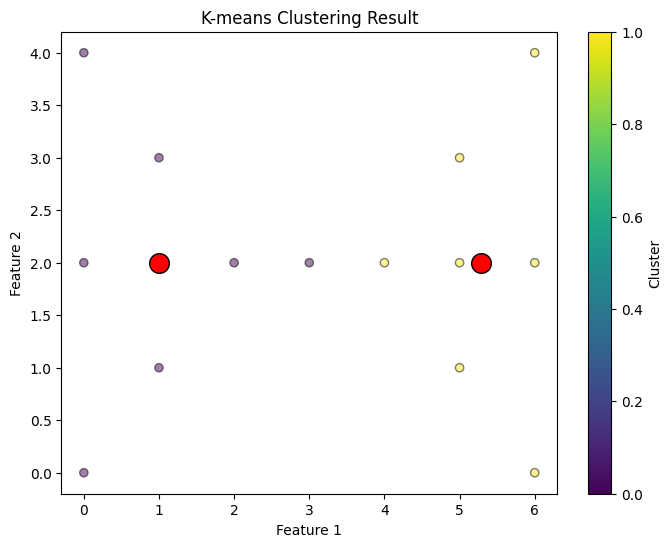

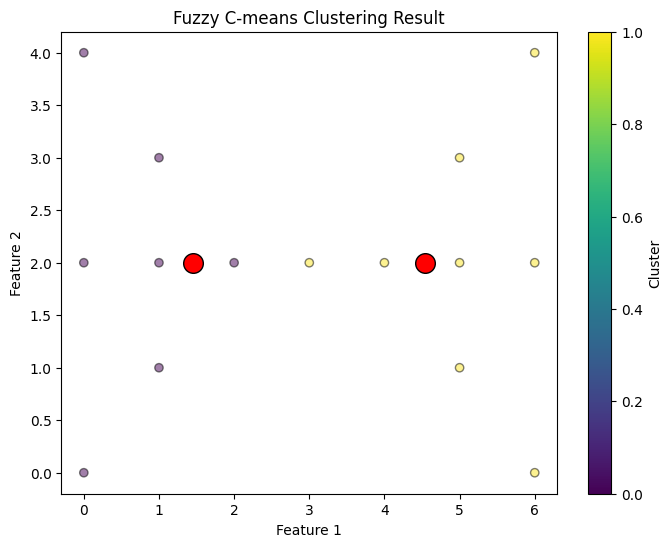

In [21]:
# Function to plot the data points with assigned clusters
def plot_clusters(X, labels, centroids=None, title=''):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolors='k')
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, c='red', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Plot K-means clustering result
plot_clusters(X, k_means_labels, k_means_centroids, title='K-means Clustering Result')

# Plot fuzzy c-means clustering result
plot_clusters(X, fuzzy_c_means_labels, fuzzy_c_means_centroids, title='Fuzzy C-means Clustering Result')

In [17]:
#Examine clustering results of point (3,2) in different trials
point = np.array([[3, 2]])

# Function to print clustering results for a specific point
def print_clustering_results(point, labels, centroids, method):
    cluster_index = labels[0]  # Get the cluster index for the point
    cluster_centroid = centroids[cluster_index]  # Get the centroid of the cluster
    print(f"Point {point} is assigned to cluster {cluster_index} using {method}.")
    print(f"Centroid of the assigned cluster: {cluster_centroid}")

# Print clustering results for K-means with 2 clusters
print_clustering_results(point, k_means_labels, k_means_centroids, "K-means")

# Print clustering results for fuzzy c-means with 2 clusterss
print_clustering_results(point, fuzzy_c_means_labels, fuzzy_c_means_centroids, "Fuzzy C-means")

Point [[3 2]] is assigned to cluster 0 using K-means.
Centroid of the assigned cluster: [1. 2.]
Point [[3 2]] is assigned to cluster 0 using Fuzzy C-means.
Centroid of the assigned cluster: [1.45657981 2.00039305]


In [18]:
# Repeat the above experiments with the number of clusters set to three
k = 3

# Apply K-means clustering with three clusters
k_means_labels_3, k_means_centroids_3 = k_means_clustering(X, k)

# Apply fuzzy c-means clustering with three clusters
fuzzy_c_means_labels_3, fuzzy_c_means_centroids_3 = fuzzy_c_means_clustering(X, k)

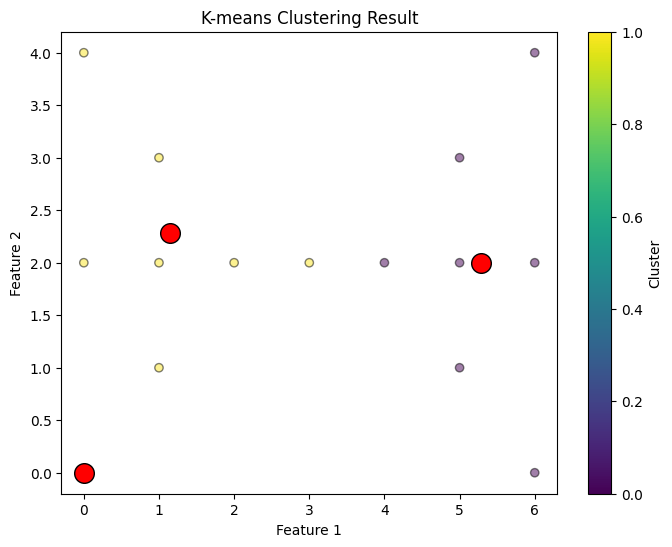

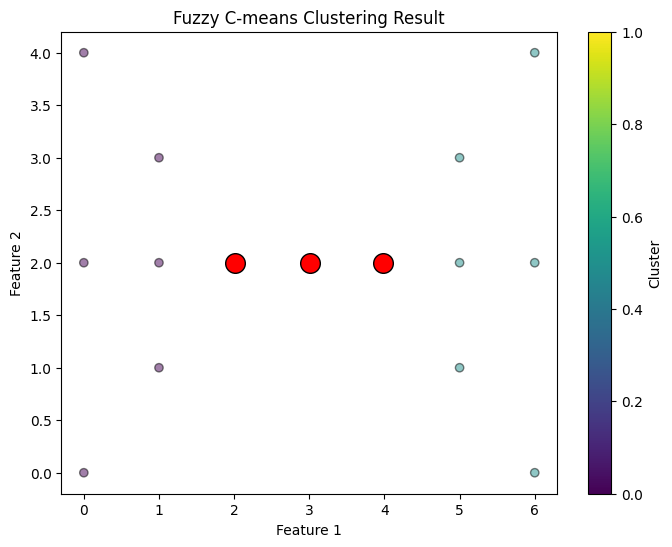

In [22]:
# Function to plot the data points with assigned clusters
def plot_clusters(X, labels, centroids=None, title=''):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolors='k')
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, c='red', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Plot K-means clustering result
plot_clusters(X, k_means_labels_3, k_means_centroids_3, title='K-means Clustering Result')

# Plot fuzzy c-means clustering result
plot_clusters(X, fuzzy_c_means_labels_3, fuzzy_c_means_centroids_3, title='Fuzzy C-means Clustering Result')

In [20]:
# Print clustering results for K-means with three clusters
print_clustering_results(point, k_means_labels_3, k_means_centroids_3, "K-means")

# Print clustering results for fuzzy c-means with three clusters
print_clustering_results(point, fuzzy_c_means_labels_3, fuzzy_c_means_centroids_3, "Fuzzy C-means")

Point [[3 2]] is assigned to cluster 2 using K-means.
Centroid of the assigned cluster: [1.14285714 2.28571429]
Point [[3 2]] is assigned to cluster 0 using Fuzzy C-means.
Centroid of the assigned cluster: [2.0148437  2.00159857]
